## COVID-19 EFFECT ON STOCK MARKET

##### DATA CLEANING AND PREPROCESSING

In [15]:
file_1 = r"C:\Users\Raheyma Arshad\Desktop\S&P 500 Historical Data.csv"
file_2 = r"C:\Users\Raheyma Arshad\Desktop\full_data.csv"

# Opening the csv files
import csv
f1 = open(file_1)
f2 = open(file_2)
csv_f1 = csv.reader(f1,delimiter = ",")
csv_f2 = csv.reader(f2,delimiter = ",")

import pandas as pd 

# Keeping S&P 500 index data in a dataframe
df1 = pd.DataFrame(csv_f1)
new_header = df1.iloc[0] 
df1 = df1[1:] 
df1.columns = new_header 
df1 = df1.rename(columns={'ï»¿Date': "date"})

# Cleaning the S&P 500 index data
df1 = df1[['date', 'Change %']]
df1 = df1.sort_index(axis=1 ,ascending=True)
df1 = df1.iloc[::-1]
df1 = df1[['date', 'Change %']]
df1['date'] = pd.to_datetime(df1['date'])
df1['day'] = df1['date'].dt.day_name()
sp_index_change = df1.drop(['day'], axis = 1)

# Keeping covid-19 data in a dataframe
df2 = pd.DataFrame(csv_f2)
new_header = df2.iloc[0] 
df2 = df2[1:] 
df2.columns = new_header 

# Cleaning the covid-19 data
df2 = df2.drop(['weekly_cases', 'weekly_deaths', 'biweekly_cases', 'biweekly_deaths'], axis=1)
df2['date'] = pd.to_datetime(df2['date'])
df2['day'] = df2['date'].dt.day_name()
df2 = df2[df2.day != 'Saturday']
df2 = df2[df2.day != 'Sunday']
df2 = df2[df2.date != '2020-01-01']
df2 = df2[df2.date != '2020-01-20']
df2 = df2[df2.date != '2020-02-17']
df2 = df2[df2.date != '2020-04-10']
df2 = df2[df2.date != '2020-05-25']
df2 = df2[df2.date != '2020-07-03']
covid_data = df2.drop(['day'], axis = 1)

# Merging the two dataframes
data = pd.merge(sp_index_change, covid_data, on = "date")

# Specifying the data tyoe of each column
data['new_cases'] = data['new_cases'].astype(float)
data['new_deaths'] = data['new_deaths'].astype(float)
data['total_cases'] = data['total_cases'].astype(float)
data['total_deaths'] = data['total_deaths'].astype(float)
data['Change %'] = data['Change %'].astype(float)

data.head()

,date,Change %,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-01-02,0.84,United States,0.0,0.0,0.0,0.0
1,2020-01-03,-0.71,United States,0.0,0.0,0.0,0.0
2,2020-01-06,0.35,United States,0.0,0.0,0.0,0.0
3,2020-01-07,-0.28,United States,0.0,0.0,0.0,0.0
4,2020-01-08,0.49,United States,0.0,0.0,0.0,0.0


##### EXPLORATORY DATA ANALYSIS

In [17]:
# Keeping the variables in lists
dates = list(data.date)
values_sp_index_change = list(data['Change %'])
values_new_cases = list(data['new_cases'])
values_new_deaths = list(data['new_deaths'])
values_total_cases = list(data['total_cases'])
values_total_deaths = list(data['total_deaths'])

import plotly.express as px

# Plotting sp_index_change
fig_sp_index_change = px.line(data, x='date', y='Change %')
fig_sp_index_change.show()

# Plotting new_cases
fig_new_cases = px.line(data, x='date', y='new_cases')
fig_new_cases.show()

# Plotting new_deaths
fig_new_deaths = px.line(data, x='date', y='new_deaths')
fig_new_deaths.show()

# Plotting total_cases
fig_total_cases = px.line(data, x='date', y='total_cases')
fig_total_cases.show()

# Plotting total_deaths
fig_total_deaths = px.line(data, x='date', y='total_deaths')
fig_total_deaths.show()

In [18]:
# Plotting relations between sp_index_change and covid variables.

# Plotting effect of new_cases on s&p 500 index percentage change.
new_cases_sp = px.scatter(data, x='new_cases', y='Change %')
new_cases_sp.show()

# Plotting effect of new_deaths on s&p 500 index percentage change.
new_deaths_sp = px.scatter(data, x='new_deaths', y='Change %')
new_deaths_sp.show()

# Plotting effect of total_cases on s&p 500 index percentage change.
total_cases_sp = px.scatter(data, x='total_cases', y='Change %')
total_cases_sp.show()

# Plotting effect of total_deaths on s&p 500 index percentage change.
total_deaths_sp = px.scatter(data, x='total_deaths', y='Change %')
total_deaths_sp.show()

In [19]:
# Finding the correlation matrix.

corrMatrix = data[['Change %', 'new_cases', 'new_deaths', 'total_cases', 'total_deaths']].corr()
corrMatrix

,Change %,new_cases,new_deaths,total_cases,total_deaths
0,,,,,
Change %,1.000000,0.101152,0.083590,0.067735,0.071734
new_cases,0.101152,1.000000,0.486197,0.890403,0.851840
new_deaths,0.083590,0.486197,1.000000,0.297160,0.365155
total_cases,0.067735,0.890403,0.297160,1.000000,0.956156
total_deaths,0.071734,0.851840,0.365155,0.956156,1.000000


##### LINEAR REGRESSION ANALYSIS

In [31]:
y = data['Change %'].values

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# S&P Index Change against new_cases
X1 = data['new_cases'].values.reshape(-1,1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=0)
clf1 = LinearRegression()
clf1.fit(X1_train, y1_train)
y1_pred = clf1.predict(X1_test)
mse1 = mean_squared_error(y1_test, y1_pred)
rsquare1 = r2_score(y1_test, y1_pred)
print('S&P Index Change against new_cases')
print('MSE:', mse1, '  ', 'R2:', rsquare1)
print('\n')

# S&P Index Change against new_deaths
X2 = data['new_deaths'].values.reshape(-1,1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=0)
clf2 = LinearRegression()
clf2.fit(X2_train, y2_train)
y2_pred = clf2.predict(X2_test)
mse2 = mean_squared_error(y2_test, y2_pred)
rsquare2 = r2_score(y2_test, y2_pred)
print('S&P Index Change against new_deaths')
print('MSE:', mse2, '  ', 'R2:', rsquare2)
print('\n')

# S&P Index Change against new_cases and new_deaths
X3 = data[['new_cases', 'new_deaths']]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2, random_state=0)
clf3 = LinearRegression()
clf3.fit(X3_train, y3_train)
y3_pred = clf3.predict(X3_test)
mse3 = mean_squared_error(y3_test, y3_pred)
rsquare3 = r2_score(y3_test, y3_pred)
print('S&P Index Change against new_cases and new_deaths')
print('MSE:', mse3, '  ', 'R2:', rsquare3)

S&P Index Change against new_cases
MSE: 6.3852735420751525    R2: -0.024757391295889608


S&P Index Change against new_deaths
MSE: 6.586815384945282    R2: -0.057102363171509296


S&P Index Change against new_cases and new_deaths
MSE: 6.560505680184232    R2: -0.052879981117077035


##### LOGISTIC REGRESSION ANALYSIS

In [33]:
# Annotating the percentage change in S&P 500 index as positive or negative

a = data['Change %'].values
a = a.astype(float)
pos_or_neg_change = []
for value in a:
    if value > 0:
        pos_or_neg_change.append(1)
    else:
        pos_or_neg_change.append(0)

data['pos_or_neg_change'] = pos_or_neg_change

y = data['pos_or_neg_change']

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

# S&P Index Change against new_cases
X1 = data['new_cases'].values.reshape(-1,1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=0)
clf1 = LogisticRegression(random_state=0).fit(X1_train, y1_train)
clf1.predict(X1_train[:2, :])
train_accuracy1 = clf1.score(X1_train, y1_train)

y1_pred = clf1.predict(X1_test)
y1_pred = y1_pred.astype(float)
y1_pred[y1_pred > 0] = 1
y1_pred[y1_pred < 0] = 0
y1_test = y1_test.astype(float)
y1_test[y1_test > 0] = 1
y1_test[y1_test < 0] = 0
data1 = {'y1_test': y1_test, 'y1_pred' : y1_pred} 
model1 = pd.DataFrame(data1) 
model1['results1'] = np.where((model1.y1_test == model1.y1_pred), 1, 0)
accuracy1 = sum(model1.results1)/len(model1.results1)

print('S&P Index Change against new_cases')
print('Training Accuracy:', train_accuracy1, '  ', 'Testing Accuracy:', accuracy1)
print('Intercept:', clf1.intercept_)
print('Coefficients:', clf1.coef_)
print('\n')

# S&P Index Change against new_deaths
X2 = data['new_deaths'].values.reshape(-1,1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=0)
clf2 = LogisticRegression(random_state=0).fit(X2_train, y2_train)
clf2.predict(X2_train[:2, :])
train_accuracy2 = clf2.score(X2_train, y2_train)

y2_pred = clf2.predict(X2_test)
y2_pred = y2_pred.astype(float)
y2_pred[y2_pred > 0] = 1
y2_pred[y2_pred < 0] = 0
y2_test = y2_test.astype(float)
y2_test[y2_test > 0] = 1
y2_test[y2_test < 0] = 0
data2 = {'y2_test': y2_test, 'y2_pred' : y2_pred} 
model2 = pd.DataFrame(data2) 
model2['results2'] = np.where((model2.y2_test == model2.y2_pred), 1, 0)
accuracy2 = sum(model2.results2)/len(model2.results2)

print('S&P Index Change against new_deaths')
print('Training Accuracy:', train_accuracy2, '  ', 'Testing Accuracy:', accuracy2)
print('Intercept:', clf2.intercept_)
print('Coefficients:', clf2.coef_)
print('\n')

# S&P Index Change against new_cases and new_deaths.
X3 = data[['new_cases', 'new_deaths']]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2, random_state=0)
clf3 = LogisticRegression(random_state=0).fit(X3_train, y3_train)
clf3.predict(X3_train)
train_accuracy3 = clf3.score(X3_train, y3_train)

y3_pred = clf3.predict(X3_test)
y3_pred = y3_pred.astype(float)
y3_pred[y3_pred > 0] = 1
y3_pred[y3_pred < 0] = 0
y3_test = y3_test.astype(float)
y3_test[y3_test > 0] = 1
y3_test[y3_test < 0] = 0
data3 = {'y3_test': y3_test, 'y3_pred' : y3_pred} 
model3 = pd.DataFrame(data3) 
model3['results3'] = np.where((model3.y3_test == model3.y3_pred), 1, 0)
accuracy3 = sum(model3.results3)/len(model3.results3)

print('S&P Index Change against new_cases and new_deaths')
print('Training Accuracy:', train_accuracy3, '  ', 'Testing Accuracy:', accuracy3)
print('Intercept:', clf3.intercept_)
print('Coefficients:', clf3.coef_)

S&P Index Change against new_cases
Training Accuracy: 0.6048387096774194    Testing Accuracy: 0.4838709677419355
Intercept: [7.69015191e-10]
Coefficients: [[1.58309071e-05]]


S&P Index Change against new_deaths
Training Accuracy: 0.6048387096774194    Testing Accuracy: 0.4838709677419355
Intercept: [0.25348516]
Coefficients: [[0.00023133]]


S&P Index Change against new_cases and new_deaths
Training Accuracy: 0.6048387096774194    Testing Accuracy: 0.4838709677419355
Intercept: [1.83185757e-07]
Coefficients: [[1.18073461e-05 1.42098903e-04]]


##### REGRESSION DECISION TREE ANALYSIS

In [34]:
data['Change %'] = data['Change %'].astype(float)
data2 = data.drop('date', axis = 1)
data2 = data2.drop('pos_or_neg_change', axis = 1)
data2 = data2.drop('location', axis = 1)

X2 = data2.drop('Change %', axis=1)
y2 = data2['Change %']

from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X2_train, y2_train)

y2_pred = regressor.predict(X2_test)

results = pd.DataFrame({'Actual':y2_test, 'Predicted':y2_pred})
results

## Evaluation

from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y2_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y2_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))

Mean Absolute Error: 2.2093548387096775
Mean Squared Error: 12.138051677419353
Root Mean Squared Error: 3.483970676888563


##### CLASSIFICATION DECISION TREE ANALYSIS

[[ 6  9]
 [ 3 13]]
              precision    recall  f1-score   support

           0       0.67      0.40      0.50        15
           1       0.59      0.81      0.68        16

    accuracy                           0.61        31
   macro avg       0.63      0.61      0.59        31
weighted avg       0.63      0.61      0.60        31



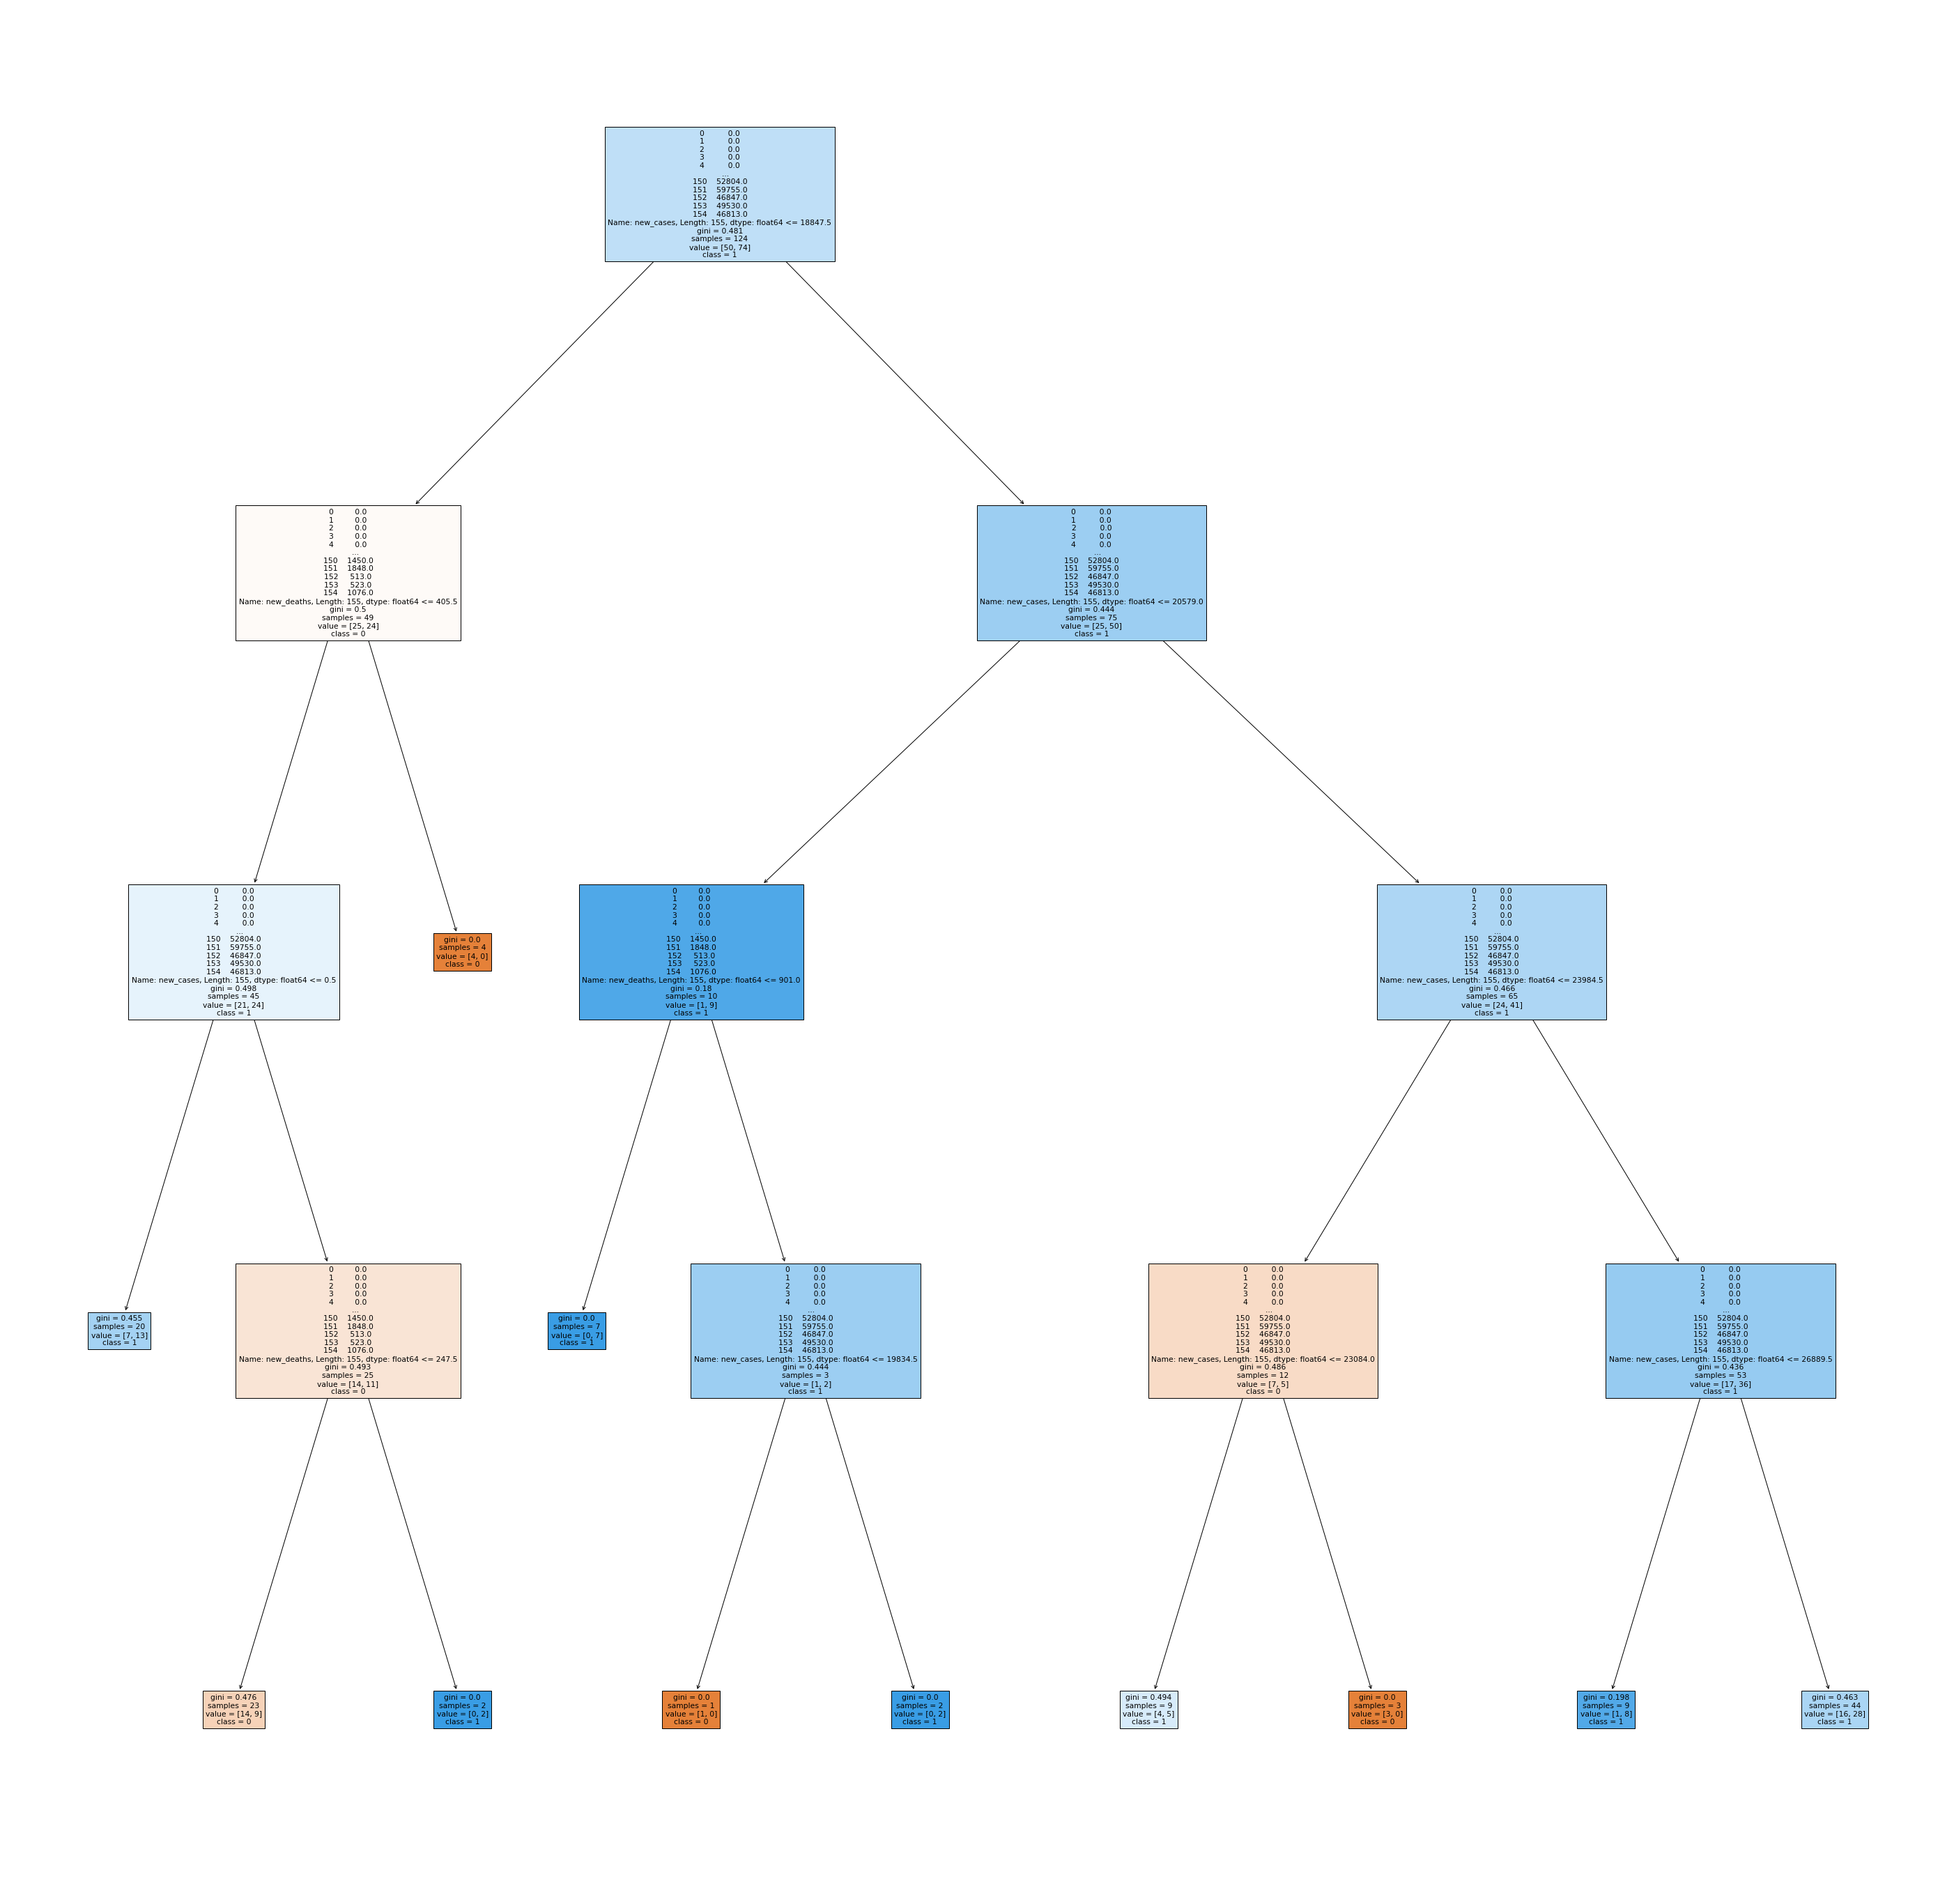

In [13]:
data['new_cases'] = data['new_cases'].astype(float)
data['new_deaths'] = data['new_deaths'].astype(float)

a = data['Change %'].values
a = a.astype(float)
pos_or_neg_change = []
for value in a:
    if value > 0:
        pos_or_neg_change.append(1)
    else:
        pos_or_neg_change.append(0)

data['pos_or_neg_change'] = pos_or_neg_change
data1 = data.drop('date', axis = 1)
data1 = data1.drop('Change %', axis = 1)
data1 = data1.drop('location', axis = 1)
data1 = data1.drop('total_cases', axis = 1)
data1 = data1.drop('total_deaths', axis = 1)

X = data1.drop('pos_or_neg_change', axis=1)
y = data1['pos_or_neg_change']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 4)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

## Evaluation

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(50,50))
_ = tree.plot_tree(classifier, 
                   feature_names = [data['new_cases'], data['new_deaths']],  
                   class_names = ['0', '1'],
                   filled=True)